## Final Project Submission

Please fill out:
* Student name: Tim Rabbitt
* Student pace: Self Paced
* Scheduled project review date/time: 
* Instructor name: Claude Friede
* Blog post URL:


# Movie Industry Analysis and Exploration

Microsoft wants to enter into the movie producing business. Before they dive into the multibillion dollar industry they want to do their due dilegance on what factors have historically contributed to a successful film. This is where I come in, I have been tasked with sorting through industry data to make their production debut a success. The focus of my exploratory analysis surrounds varibales that influence return on investement (ROI). From a business standpoint, I thought this would an appropriate focus. As Microsoft begins to establish themselves in the industry the more they can get in return for initial investments, the better. By analyzing a variety of ROI influences, I can make recommendations to Microsoft that will produce the highest rate of return possible. The ROI influences that I focused my analysis on are as followed:

How does the release date of the film influence return on investment?

How does the genre of the film influence return on investment?

What actors/actresses have produced the highest return on investment?

In [1]:
#importing needed libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

### QUESTION 1: How does the release date of a film influence return on investment?

For this analysis, I am going to use data from The Numbers movie budgets csv. This data provides us with the release date, production budget, and worldwide gross revenue. All three data points will be needed to investigate how the release date of a movie affects the productions return on investment. Percent ROI will be calculated using the worldwide gross / production budget *100.



In [2]:
#importing the numbers movie budgets csv
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv')
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
#Inspecting column data types
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Upon initial investigation, this dataframe contains 5782 non-null entries. Release date, production budget, and worldwide gross are all object data types. In order to manipulate this data more effectively converting production budget, domestic gross, and worldwide gross into integer data types and release date to datetime data type is necessary.

In [4]:
#Dropping unwanted punctuation
tn_df.iloc[:, 3:6] = tn_df.iloc[:, 3:6].replace('[$,]','', regex=True)

In [5]:
#Converting columns object Dtype to numerical/datetime values
tn_df.iloc[:, 3:6] = tn_df.iloc[:, 3:6].apply(pd.to_numeric)
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])

In [6]:
#Checking to see if that worked
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [7]:
#Checking for NaN values in the dataset
tn_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

While there are no NaN entries in the dataframe, I want to investigate whether there are entries of 0 in my ROI parameters. 

In [8]:
#how many values are equal to 0
len(tn_df.loc[tn_df['worldwide_gross'] == 0])

367

In [9]:
#checking for values equal to 0 in production budget
tn_df.loc[tn_df['production_budget'] == 0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


It looks like there are 367 values in the worldwide gross column that have 0 as an entry. I am opting to drop these values from the dataframe so that they do not affect the ROI calculation for those particular release dates.

In [10]:
#Dropping 0 values
tn_df = tn_df[tn_df['worldwide_gross'] != 0]

In [11]:
#Did that work
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5415 non-null   int64         
 1   release_date       5415 non-null   datetime64[ns]
 2   movie              5415 non-null   object        
 3   production_budget  5415 non-null   int64         
 4   domestic_gross     5415 non-null   int64         
 5   worldwide_gross    5415 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 296.1+ KB


In [12]:
#Creating month of the year column
tn_df['Month of Release'] = tn_df['release_date'].dt.month_name()
tn_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Month of Release
5775,76,2006-05-26,Cavite,7000,70071,71644,May
5776,77,2004-12-31,The Mongol King,7000,900,900,December
5778,79,1999-04-02,Following,6000,48482,240495,April
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,July
5781,82,2005-08-05,My Date With Drew,1100,181041,181041,August


In [13]:
#We would like to see percent ROI, creating a column that shows worldwide gross / production budget  
tn_df['Percent ROI'] = tn_df['worldwide_gross'] / tn_df['production_budget'] *100
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Month of Release,Percent ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,December,653.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,254.667286
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,June,42.789243
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,May,424.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,December,415.369636


In [14]:
#Creating a new df with just Month of Release and Percent ROI columns
month_roi_df = tn_df[['Month of Release', 'Percent ROI']]
month_roi_df.head()

,Month of Release,Percent ROI
0,December,653.257713
1,May,254.667286
2,June,42.789243
3,May,424.384139
4,December,415.369636


We are ready to plot our graph! I want to group by Month of Release and take the median Percent ROI for that given month. While investigating the data, I noticed a number of outliers (films that did VERY well considering ROI). Therefore I decided to go with median as my measurement of central tendancy becuase it is more immune to outliers than mean would be.

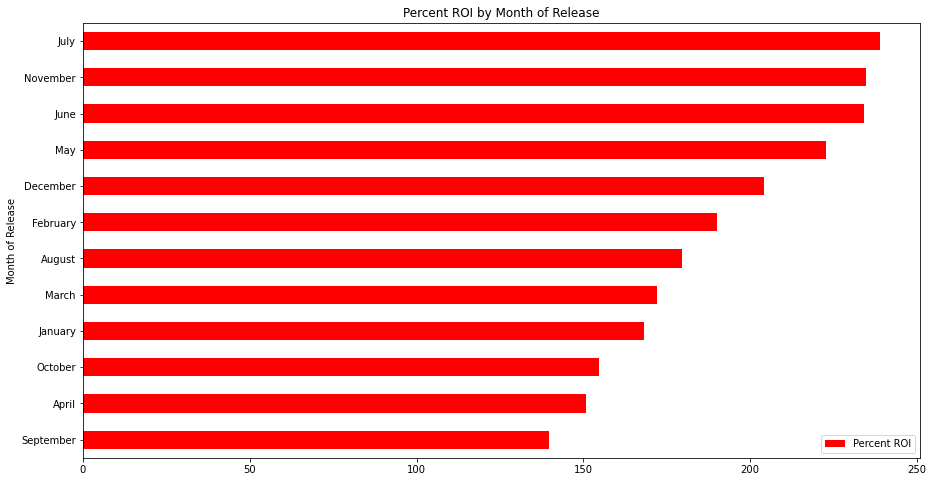

In [15]:
#Plotting
# fig, ax = plt.subplots()
(
    month_roi_df
    .groupby('Month of Release')
    .median()
    .sort_values(by='Percent ROI')
    .plot(kind='barh', 
          figsize=(15,8), 
          title='Percent ROI by Month of Release', 
          xlabel='Month of Release', 
          ylabel='Percent Return on Investment', 
          color='red')
)
plt.show();

### QUESTION 2: How does genre of the film influence the productions return on investment?

For this investigation we will need the IMDb database. This provides us with the movie title and genre, will need these elements to explore their influence on ROI.   

In [16]:
#Importing the imdb file
conn = sqlite3.connect('zippedData/im.db')
imdb_df = pd.read_sql("""SELECT *
                           FROM movie_basics
                      """, conn)

In [17]:
#Previewing the dataframe
imdb_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [18]:
#Investigating column Dtypes and number of Non-null values
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Upon intitial investigation, we have a large dataframe with a non-null value count of 146144. We do have approximately 6500 fewer genre non-null counts than the rest of the dataframe. Considering the large amount of data we have without those the missing genre counts, I am opting to treat those as theyre own category, that being 'None'. Both primary_title and genres have a Dtype of object which is appropriate moving forward with our analysis. To prep for a merge with our dataframe from above, I will look to strip the titles of punctation and unneeded spaces. 

In [19]:
#Stripping primary_title column spaces ahead and after title
imdb_df['primary_title'].str.strip()
imdb_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [20]:
#Stipping and replacing puctuation so dataframes have better matching
imdb_df['primary_title'].replace('[$,/:.!?]','', regex=True, inplace=True)
imdb_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [21]:
#Did we lose any data
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [22]:
#Cleaning up the tn_df (ROI) dataframe
tn_df['movie'].str.strip()

0                                            Avatar
1       Pirates of the Caribbean: On Stranger Tides
2                                      Dark Phoenix
3                           Avengers: Age of Ultron
4                 Star Wars Ep. VIII: The Last Jedi
                           ...                     
5775                                         Cavite
5776                                The Mongol King
5778                                      Following
5779                  Return to the Land of Wonders
5781                              My Date With Drew
Name: movie, Length: 5415, dtype: object

In [23]:
#Cleaning up the tn_df (ROI) dataframe
tn_df['movie'].replace('[$,/:.!?]','', regex=True, inplace=True)

Now that we have cleaned up the primary_title and movie columns in our respective dataframes we are ready to merge the two dataframes based off common entries in the two columns.

In [24]:
#Merging dataframes and labeling new dataframe as genre_gross
genre_gross = imdb_df.merge(tn_df, left_on='primary_title', right_on='movie')
genre_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3503 entries, 0 to 3502
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           3503 non-null   object        
 1   primary_title      3503 non-null   object        
 2   original_title     3502 non-null   object        
 3   start_year         3503 non-null   int64         
 4   runtime_minutes    3061 non-null   float64       
 5   genres             3436 non-null   object        
 6   id                 3503 non-null   int64         
 7   release_date       3503 non-null   datetime64[ns]
 8   movie              3503 non-null   object        
 9   production_budget  3503 non-null   int64         
 10  domestic_gross     3503 non-null   int64         
 11  worldwide_gross    3503 non-null   int64         
 12  Month of Release   3503 non-null   object        
 13  Percent ROI        3503 non-null   float64       
dtypes: datet

We lost a considerable amount of data as there were only 3503 non-null values that were shared between the columns in their respective dataframes. However I believe 3503 is still an adequate number of films to move forward and learn from. 

In [25]:
#Previewing new dataframe
genre_gross.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Month of Release,Percent ROI
0,tt0249516,Foodfight,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,2012-12-31,Foodfight,45000000,0,73706,December,0.163791
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,1995-08-18,Mortal Kombat,20000000,70433227,122133227,August,610.666135
2,tt0326592,The Overnight,The Overnight,2010,88.0,None,21,2015-06-19,The Overnight,200000,1109808,1165996,June,582.998000
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,2015-06-19,The Overnight,200000,1109808,1165996,June,582.998000
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,2013-03-22,On the Road,25000000,720828,9313302,March,37.253208


I would like to clean up the genres columns, it is not helpful that there are 3 different genres per film. I am going to explode the genres column so we can clearly identify all the genres of a given movie.

In [26]:
# Creating primary genre column
genre_gross['Genre'] = genre_gross['genres'].str.split(',')
genre_gross = genre_gross.explode('Genre')

In [27]:
#Creating new df with just Genre and Percent ROI
genre_ROI_df = genre_gross[['Genre', 'Percent ROI']]
genre_ROI_df.head()

,Genre,Percent ROI
0,Action,0.163791
0,Animation,0.163791
0,Comedy,0.163791
1,Action,610.666135
1,Adventure,610.666135


In [28]:
#Grouping df by Genre and median Percent ROI based on the given genre
genre_group = genre_ROI_df.groupby('Genre').median()
best_genre_ROIs = genre_group.sort_values('Percent ROI', ascending=False).head(10)

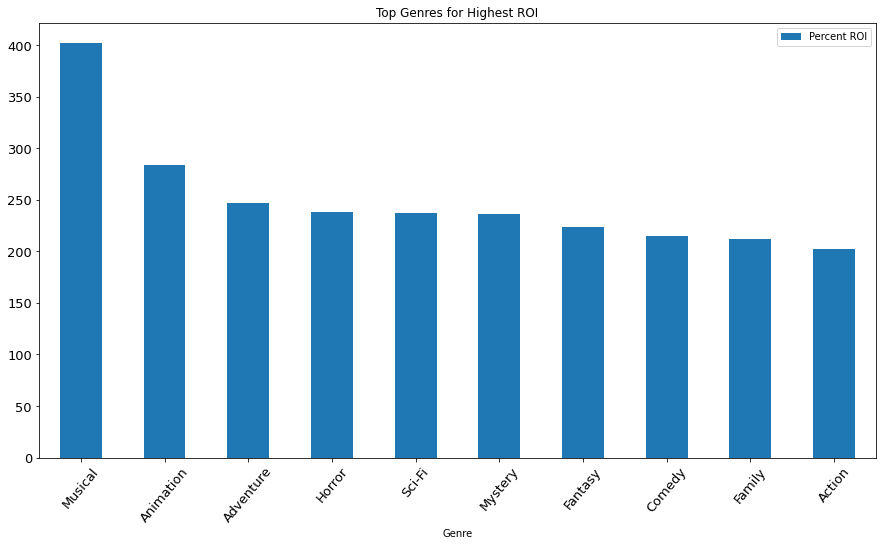

In [42]:
#Plotting
(best_genre_ROIs
 .plot(kind='bar', 
       figsize=(15,8), 
       title='Top Genres for Highest ROI', 
       xlabel='Genre', 
       rot=50, 
       fontsize=13));

To further explore these variables, I wanted to see if a given genre found more success (higher return on investment) if the film was released in a certain month of the year.

In [30]:
#Creating new df with Genre, Percent ROI and Month of Release
best_month_genre = genre_gross[['Genre', 'Percent ROI', 'Month of Release']]
best_month_genre.head()

,Genre,Percent ROI,Month of Release
0,Action,0.163791,December
0,Animation,0.163791,December
0,Comedy,0.163791,December
1,Action,610.666135,August
1,Adventure,610.666135,August


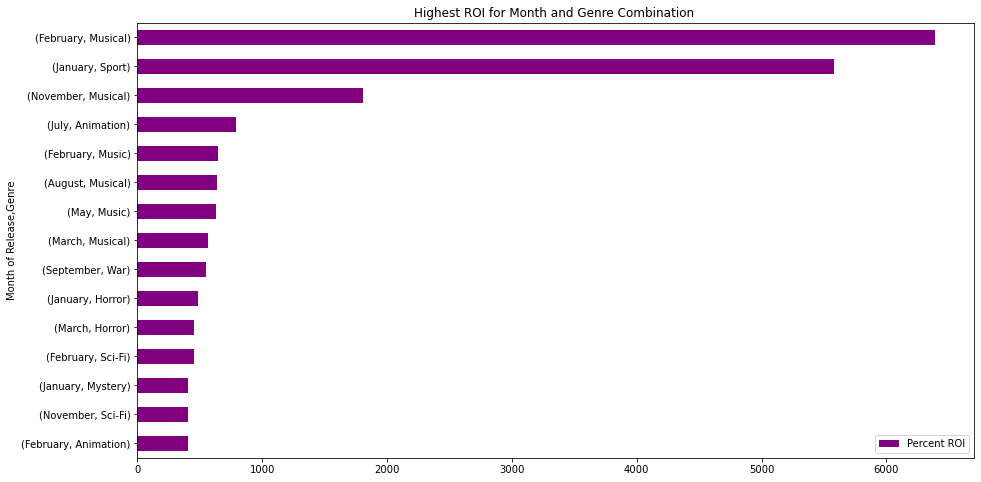

In [31]:
#Plotting, grouped by Month of Release then Genre and analyzing the median Percent ROI
Month_Group_ROI = best_month_genre.groupby(['Month of Release', 'Genre']).median()
(
Month_Group_ROI
.sort_values(by='Percent ROI', ascending=True)
.tail(15).
 plot(kind='barh', 
      figsize=(15,8), 
      title='Highest ROI for Month and Genre Combination ', 
      color='purple')
);

### QUESTION 3: What actors/actresses produce the highest ROI for movie productions?

For this question we will again be using the IMDB database. In this database we can find the primary_name, primary_title and category (what role did they have in the production). We will then merge our ROI dataframe from above to help answer the question above.

In [32]:
#importing the imdb database
conn = sqlite3.connect('zippedData/im.db')
actors_df = pd.read_sql("""SELECT primary_name, primary_title, category
                                FROM persons p
                                JOIN principals
                                    USING(person_id)
                                JOIN movie_basics mb
                                    USING(movie_id)
                               WHERE category = 'actor'
                                  OR category = 'actress';
                        """, conn)
actors_df.head()

,primary_name,primary_title,category
0,Tommy Dysart,A Thin Life,actor
1,Brittania Nicol,The Wicker Tree,actress
2,Henry Garrett,The Wicker Tree,actor
3,Graham McTavish,The Wicker Tree,actor
4,Jacqueline Leonard,The Wicker Tree,actress


In [33]:
#Investigating Non-Null count and Dtype
actors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402685 entries, 0 to 402684
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   primary_name   402685 non-null  object
 1   primary_title  402685 non-null  object
 2   category       402685 non-null  object
dtypes: object(3)
memory usage: 9.2+ MB


In [34]:
#Merging dataframes on 'primary_title' and 'movie' in respective dataframes. Default inner join
actors_ROI_df = actors_df.merge(tn_df, left_on='primary_title', right_on='movie')
actors_ROI_df.head()

,primary_name,primary_title,category,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Month of Release,Percent ROI
0,Taron Egerton,Eddie the Eagle,actor,86,2016-02-26,Eddie the Eagle,23000000,15789389,45060480,February,195.915130
1,Hugh Jackman,Eddie the Eagle,actor,86,2016-02-26,Eddie the Eagle,23000000,15789389,45060480,February,195.915130
2,Tom Costello,Eddie the Eagle,actor,86,2016-02-26,Eddie the Eagle,23000000,15789389,45060480,February,195.915130
3,Jo Hartley,Eddie the Eagle,actress,86,2016-02-26,Eddie the Eagle,23000000,15789389,45060480,February,195.915130
4,Matthew McConaughey,Free State of Jones,actor,81,2016-06-24,Free State of Jones,50000000,20810036,23237252,June,46.474504


In [35]:
#Investigationg new dataframe
actors_ROI_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11524 entries, 0 to 11523
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   primary_name       11524 non-null  object        
 1   primary_title      11524 non-null  object        
 2   category           11524 non-null  object        
 3   id                 11524 non-null  int64         
 4   release_date       11524 non-null  datetime64[ns]
 5   movie              11524 non-null  object        
 6   production_budget  11524 non-null  int64         
 7   domestic_gross     11524 non-null  int64         
 8   worldwide_gross    11524 non-null  int64         
 9   Month of Release   11524 non-null  object        
 10  Percent ROI        11524 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 1.1+ MB


We have 12090 films in our new data set. All columns have the same amount of non-null values.

In [36]:
#Creating a new dataframe with Primary Name and Percent ROI
actors_ROI = actors_ROI_df[['primary_name', 'Percent ROI']]
actors_ROI.head()

,primary_name,Percent ROI
0,Taron Egerton,195.915130
1,Hugh Jackman,195.915130
2,Tom Costello,195.915130
3,Jo Hartley,195.915130
4,Matthew McConaughey,46.474504


I would like to analyze actors/actresses that have a minumum of 5 movies in the dataset. If an actor/actress only has one movie, for instance, I do not believe that indicates a "track-record" of starring in films with high return on investment.

In [37]:
#Creating a new df that has the number of films filtered to >=5
actors_min_5 = actors_ROI.groupby('primary_name').filter(lambda x : len(x)>=5)
actors_min_5['primary_name'].value_counts().tail()

Dakota Johnson     5
Edgar Ramírez      5
Winona Ryder       5
Maggie Grace       5
Abigail Breslin    5
Name: primary_name, dtype: int64

In [38]:
#Investigating new dataframe
actors_min_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2369 entries, 0 to 11513
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   primary_name  2369 non-null   object 
 1   Percent ROI   2369 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.5+ KB


In [39]:
#How many celebrities have more than 5 films
len(actors_min_5['primary_name'].value_counts())

317

We have 352 actors and actresses with a minimum of 5 films to explore their influence on return on investment.

In [40]:
group_df = actors_min_5.groupby('primary_name').median()
group_df.sort_values('Percent ROI', ascending=True, inplace=True)
top_actors = group_df.tail(15)

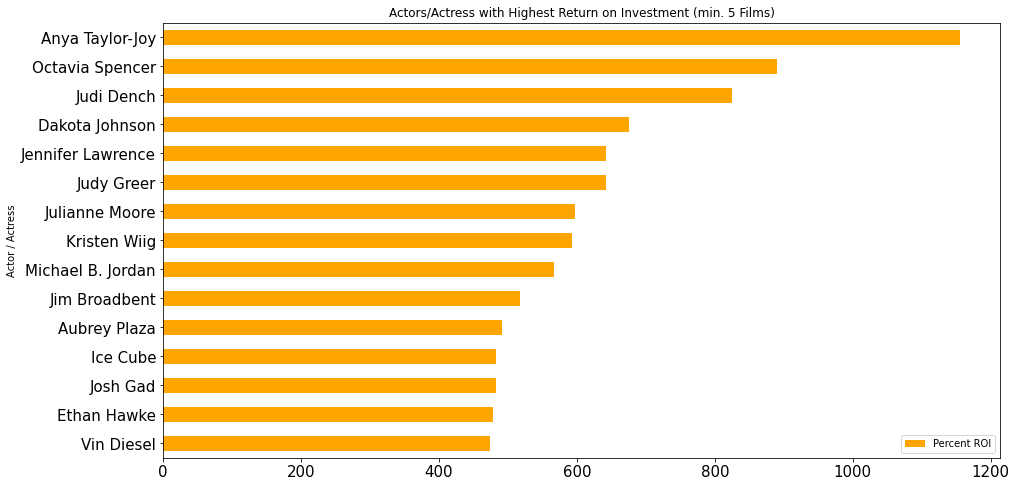

In [41]:
(top_actors
 .plot(kind='barh', 
       figsize=(15,8), 
       xlabel='Actor / Actress', 
       title='Actors/Actress with Highest Return on Investment (min. 5 Films)', 
       fontsize=15, 
       color='orange'));

## Conclusion:

### First Movie Recommendation:

An Animated Musical

Released in February or July

With characters voiced by actors/actresses that have a track-record of high return on investment and appearing in animated films such as Kristen Wiig and Josh Gad.

### Second Movie Recommendation:

A Horror Sci-Fi

Released in May or November

Starring actors/actresses that have a track-record of high return on investment and appearing in thrilling films such as Anya Taylor-Joy, Octavia Spencer, and Judi Dench.

I feel confident that my anlysis will help Microsoft to make appropriate decisions regarding the direction of their first film. By following the recommendations above they can optimize return on investment and produce a profitable movie. Future analysis could include an investigation into which genres these top actors/actresses find their success. Production budget, directors, and rating would be interesting to look into to see how they may affect ROI. All things considered, I believe this is a good start for Microsoft's venture into the movie industry.

### Sources

https://stackoverflow.com/questions/49735683/python-removing-rows-on-count-condition